<a href="https://colab.research.google.com/github/imabari/rakuten_tools/blob/main/rakuten_tac_japan_area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.esrij.com/cgi-bin/wp/wp-content/uploads/2012/10/japan_ver84.zip

--2022-06-13 15:59:45--  https://www.esrij.com/cgi-bin/wp/wp-content/uploads/2012/10/japan_ver84.zip
Resolving www.esrij.com (www.esrij.com)... 180.235.251.136
Connecting to www.esrij.com (www.esrij.com)|180.235.251.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6180600 (5.9M) [application/zip]
Saving to: ‘japan_ver84.zip.1’

japan_ver84.zip.1   100%[===================>]   5.89M  2.11MB/s    in 2.8s    

2022-06-13 15:59:49 (2.11 MB/s) - ‘japan_ver84.zip.1’ saved [6180600/6180600]



In [ ]:
!pip install -U geopandas
!pip install -U rtree
!pip install -U pygeos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
# 解像度
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 200

In [ ]:
japan = gpd.read_file("japan_ver84.zip!japan_ver84")

In [ ]:
# 都道府県番号
japan["PREF"] = japan["JCODE"].str[:2]

In [ ]:
# 郡と市区町村名を結合
japan["CITY"] = japan[["GUN", "SEIREI", "SIKUCHOSON"]].fillna("").apply(lambda s: "".join(s), axis=1)

In [ ]:
japan

,JCODE,KEN,SICHO,GUN,SEIREI,SIKUCHOSON,CITY_ENG,P_NUM,H_NUM,Shape_Leng,Shape_Area,geometry,PREF,CITY
0,01101,北海道,石狩振興局,None,札幌市,中央区,"Sapporo-shi, Chuo-ku",239944,146024,0.542590,0.005128,"POLYGON ((141.34233 43.06682, 141.35520 43.068...",01,札幌市中央区
1,01102,北海道,石狩振興局,None,札幌市,北区,"Sapporo-shi, Kita-ku",286054,153908,0.567773,0.007031,"POLYGON ((141.40839 43.18395, 141.40427 43.182...",01,札幌市北区
2,01103,北海道,石狩振興局,None,札幌市,東区,"Sapporo-shi, Higashi-ku",262298,144421,0.397203,0.006289,"POLYGON ((141.44698 43.15513, 141.44860 43.153...",01,札幌市東区
3,01104,北海道,石狩振興局,None,札幌市,白石区,"Sapporo-shi, Shiroishi-ku",214050,124710,0.308211,0.003815,"POLYGON ((141.46569 43.10000, 141.46812 43.097...",01,札幌市白石区
4,01105,北海道,石狩振興局,None,札幌市,豊平区,"Sapporo-shi, Toyohira-ku",224435,129875,0.428316,0.005101,"POLYGON ((141.38479 43.04660, 141.38558 43.047...",01,札幌市豊平区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,47362,沖縄県,None,島尻郡,None,八重瀬町,Yaese-cho,31882,12618,0.288020,0.002441,"MULTIPOLYGON (((127.76117 26.12400, 127.76255 ...",47,島尻郡八重瀬町
1903,47375,沖縄県,None,宮古郡,None,多良間村,Tarama-son,1103,520,0.247357,0.001956,"MULTIPOLYGON (((124.73021 24.64206, 124.73135 ...",47,宮古郡多良間村
1904,47381,沖縄県,None,八重山郡,None,竹富町,Taketomi-cho,4300,2483,2.158236,0.029741,"MULTIPOLYGON (((123.76601 24.06841, 123.76380 ...",47,八重山郡竹富町
1905,47382,沖縄県,None,八重山郡,None,与那国町,Yonaguni-cho,1697,953,0.314766,0.002570,"MULTIPOLYGON (((123.00349 24.47277, 123.00128 ...",47,八重山郡与那国町


In [ ]:
df0 = pd.read_json("https://cellmap.rukihena.com/mls44011.json")
df0

,lat,lon,area,cell,unit,range,samples,created,updated
0,35.673958,139.447787,1,51200257,1,23,2,1651282432,1651282432
1,34.684203,135.764690,1,67932160,7,74,3,1651307728,1651307728
2,34.722659,135.726660,1,68311395,17,76,4,1646717700,1646717700
3,34.708910,135.711737,1,68445141,15,37,2,1646717700,1646717700
4,34.620415,135.686617,1,68665311,38,71,3,1649312459,1649312459
...,...,...,...,...,...,...,...,...,...
108575,26.211672,127.674478,65440,219391760,495,97,2,1637397058,1637397058
108576,26.252926,127.710943,65440,219394837,500,27,2,1649833550,1649833550
108577,26.207604,127.698940,65440,219397890,493,187,2,1650355595,1653655222
108578,26.271765,127.728284,65440,219398668,503,59,3,1649833550,1649833550


In [ ]:
# 日時に変換
df0["created"] = pd.to_datetime(df0["created"], unit="s")
df0["updated"] = pd.to_datetime(df0["updated"], unit="s")

In [ ]:
# 経過日数
df0["days"] = (df0.updated - df0.created).dt.days

In [ ]:
df0["eNB-LCID"] = df0.cell.apply(lambda x: f"{x >> 8}-{x & 0xFF}")

In [ ]:
# 条件抽出
df1 = df0.query("(0x400000 < cell < 0xD800000) & (unit < 390) & (samples > 10) & (days > 7)").copy()
df1

,lat,lon,area,cell,unit,range,samples,created,updated,days,eNB-LCID
6,35.595048,139.671186,111,71304961,152,195,12,2022-01-10 02:55:56,2022-02-11 06:09:46,32,278535-1
7,35.593327,139.668826,111,71304962,193,2156,15,2021-02-22 04:39:16,2022-05-14 07:40:56,446,278535-2
8,35.594231,139.669523,111,71304963,150,17414,138,2020-12-02 10:37:08,2022-06-05 07:39:36,549,278535-3
9,35.592671,139.675619,111,71304964,141,407,55,2021-01-14 19:52:18,2022-03-19 16:09:02,428,278535-4
10,35.594507,139.674061,111,71304966,95,285,36,2021-01-14 19:52:18,2022-03-19 16:09:02,428,278535-6
...,...,...,...,...,...,...,...,...,...,...,...
106709,33.617709,134.350024,50500,118422785,293,3454,28,2022-03-12 02:20:22,2022-06-06 03:13:36,86,462589-1
106872,35.647113,139.836642,55556,71508231,262,257,17,2021-05-09 17:41:36,2022-02-13 08:23:21,279,279329-7
106874,35.647066,139.834350,55556,71508233,17,249,11,2021-05-09 17:41:36,2022-02-13 08:23:21,279,279329-9
106877,35.647678,139.835363,55556,71547658,292,1914,31,2021-05-09 17:41:36,2022-02-13 08:23:21,279,279483-10


In [ ]:
# 緯度経度をgeometryに変換
pt_df = gpd.GeoDataFrame(df1, geometry = gpd.points_from_xy(df1.lon, df1.lat), crs="EPSG:6668")
pt_df

,lat,lon,area,cell,unit,range,samples,created,updated,days,eNB-LCID,geometry
6,35.595048,139.671186,111,71304961,152,195,12,2022-01-10 02:55:56,2022-02-11 06:09:46,32,278535-1,POINT (139.67119 35.59505)
7,35.593327,139.668826,111,71304962,193,2156,15,2021-02-22 04:39:16,2022-05-14 07:40:56,446,278535-2,POINT (139.66883 35.59333)
8,35.594231,139.669523,111,71304963,150,17414,138,2020-12-02 10:37:08,2022-06-05 07:39:36,549,278535-3,POINT (139.66952 35.59423)
9,35.592671,139.675619,111,71304964,141,407,55,2021-01-14 19:52:18,2022-03-19 16:09:02,428,278535-4,POINT (139.67562 35.59267)
10,35.594507,139.674061,111,71304966,95,285,36,2021-01-14 19:52:18,2022-03-19 16:09:02,428,278535-6,POINT (139.67406 35.59451)
...,...,...,...,...,...,...,...,...,...,...,...,...
106709,33.617709,134.350024,50500,118422785,293,3454,28,2022-03-12 02:20:22,2022-06-06 03:13:36,86,462589-1,POINT (134.35002 33.61771)
106872,35.647113,139.836642,55556,71508231,262,257,17,2021-05-09 17:41:36,2022-02-13 08:23:21,279,279329-7,POINT (139.83664 35.64711)
106874,35.647066,139.834350,55556,71508233,17,249,11,2021-05-09 17:41:36,2022-02-13 08:23:21,279,279329-9,POINT (139.83435 35.64707)
106877,35.647678,139.835363,55556,71547658,292,1914,31,2021-05-09 17:41:36,2022-02-13 08:23:21,279,279483-10,POINT (139.83536 35.64768)


In [ ]:
# geometryから市町村名を取得
spj = gpd.sjoin(pt_df, japan).reset_index(drop=True)
spj

,lat,lon,area,cell,unit,range,samples,created,updated,days,...,GUN,SEIREI,SIKUCHOSON,CITY_ENG,P_NUM,H_NUM,Shape_Leng,Shape_Area,PREF,CITY
0,35.595048,139.671186,111,71304961,152,195,12,2022-01-10 02:55:56,2022-02-11 06:09:46,32,...,None,None,大田区,Ota-ku,733672,398687,0.772836,0.006211,13,大田区
1,35.593327,139.668826,111,71304962,193,2156,15,2021-02-22 04:39:16,2022-05-14 07:40:56,446,...,None,None,大田区,Ota-ku,733672,398687,0.772836,0.006211,13,大田区
2,35.594231,139.669523,111,71304963,150,17414,138,2020-12-02 10:37:08,2022-06-05 07:39:36,549,...,None,None,大田区,Ota-ku,733672,398687,0.772836,0.006211,13,大田区
3,35.582969,139.677683,111,71304968,159,20122,617,2020-12-15 13:01:17,2022-06-03 22:50:53,535,...,None,None,大田区,Ota-ku,733672,398687,0.772836,0.006211,13,大田区
4,35.587075,139.668339,111,71304972,50,17345,83,2020-04-09 12:17:42,2022-05-24 20:48:56,775,...,None,None,大田区,Ota-ku,733672,398687,0.772836,0.006211,13,大田区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71853,26.189262,127.709257,49153,218120460,93,1233,160,2021-11-01 12:23:30,2022-05-03 10:59:29,182,...,島尻郡,None,南風原町,Haebaru-cho,40375,16003,0.162651,0.000971,47,島尻郡南風原町
71854,26.204918,127.729235,49153,218121994,36,1778,13,2022-03-05 07:22:06,2022-04-19 08:06:55,45,...,島尻郡,None,南風原町,Haebaru-cho,40375,16003,0.162651,0.000971,47,島尻郡南風原町
71855,26.201700,127.727453,49153,218121995,352,3139,16,2022-03-05 07:22:06,2022-05-03 10:59:29,59,...,島尻郡,None,南風原町,Haebaru-cho,40375,16003,0.162651,0.000971,47,島尻郡南風原町
71856,26.196731,127.730552,49153,218123523,249,1315,14,2022-03-05 07:22:06,2022-04-19 08:06:55,45,...,島尻郡,None,南風原町,Haebaru-cho,40375,16003,0.162651,0.000971,47,島尻郡南風原町


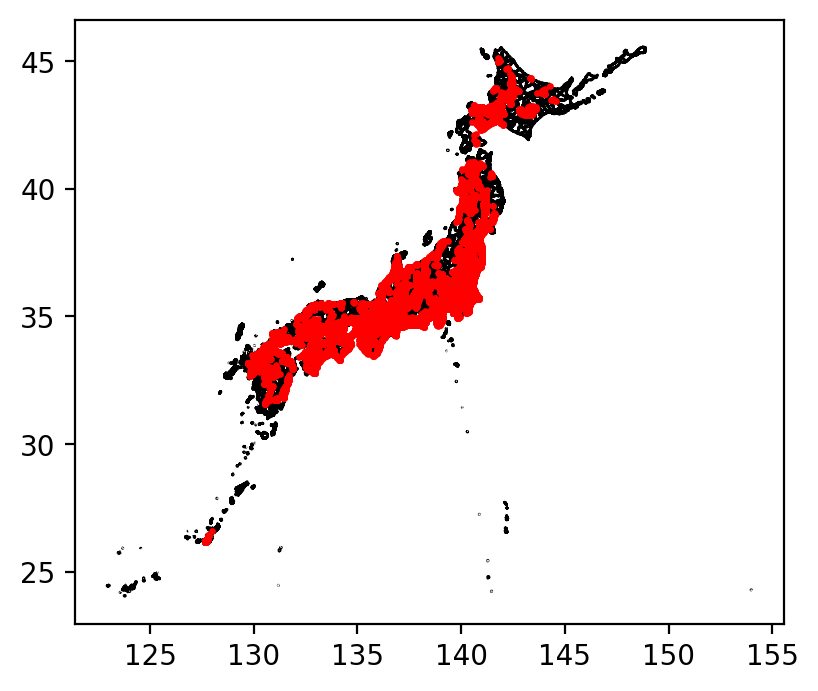

In [ ]:
base = japan.plot(color="white", edgecolor="black")
spj.plot(ax=base, marker="o", color="red", markersize=2)

In [ ]:
df2 = spj.pivot_table(index=["JCODE", "KEN", "CITY"], columns="area", values="cell", aggfunc=len, fill_value=0)
df2

,,area,111,112,113,114,211,212,213,214,311,312,...,49539,49678,49684,49690,49693,49697,49699,50500,55556,63968
JCODE,KEN,CITY,,,,,,,,,,,,,,,,,,,,,
01101,北海道,札幌市中央区,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01102,北海道,札幌市北区,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01103,北海道,札幌市東区,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01104,北海道,札幌市白石区,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01105,北海道,札幌市豊平区,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47212,沖縄県,豊見城市,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47213,沖縄県,うるま市,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47327,沖縄県,中頭郡北中城村,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 横持ちから縦持ち、sample5以下は除去
df3 = df2.stack().reset_index().rename(columns={0: "sample"}).query("sample > 2")
df3

,JCODE,KEN,CITY,area,sample
13,01101,北海道,札幌市中央区,1026,147
297,01102,北海道,札幌市北区,1026,117
581,01103,北海道,札幌市東区,1026,137
865,01104,北海道,札幌市白石区,1026,97
1149,01105,北海道,札幌市豊平区,1026,81
...,...,...,...,...,...
417467,47208,沖縄県,浦添市,49153,36
418035,47212,沖縄県,豊見城市,49153,33
418319,47213,沖縄県,うるま市,49153,3
418887,47329,沖縄県,中頭郡西原町,49153,3


In [ ]:
# エリアは昇順、sampleは降順で並び替え
df3.sort_values(["area", "sample"], ascending=[True, False], inplace=True)

In [ ]:
# エリアごとに連番
df3["id"] = df3.groupby("area").cumcount() + 1

In [ ]:
df3

,JCODE,KEN,CITY,area,sample,id
140580,13111,東京都,大田区,111,215,1
140012,13109,東京都,品川区,111,192,2
140864,13112,東京都,世田谷区,111,182,3
155064,14109,神奈川県,横浜市港北区,111,152,4
158756,14134,神奈川県,川崎市高津区,111,140,5
...,...,...,...,...,...,...
417183,47205,沖縄県,宜野湾市,49153,12,5
418319,47213,沖縄県,うるま市,49153,3,6
418887,47329,沖縄県,中頭郡西原町,49153,3,7
384531,40349,福岡県,糟屋郡粕屋町,49697,5,1


In [ ]:
df4 = df3.pivot(index="area", columns="id", values=["KEN", "CITY", "sample"]).swaplevel(0, 1, axis=1).sort_index(axis=1)

In [ ]:
df4

id         1                    2                    3                     4   \
         CITY   KEN sample    CITY   KEN sample    CITY   KEN sample     CITY   
area                                                                            
111       大田区   東京都    215     品川区   東京都    192    世田谷区   東京都    182   横浜市港北区   
112       大田区   東京都    296  川崎市川崎区  神奈川県    173  横浜市鶴見区  神奈川県    167    横浜市中区   
113      世田谷区   東京都    420     杉並区   東京都    342     中野区   東京都    117      練馬区   
114       練馬区   東京都    274     板橋区   東京都    213      北区   東京都    120      戸田市   
211      千代田区   東京都    215     台東区   東京都     87     中央区   東京都     64      豊島区   
...       ...   ...    ...     ...   ...    ...     ...   ...    ...      ...   
48129     霧島市  鹿児島県     22     姶良市  鹿児島県     15     NaN   NaN    NaN      NaN   
48130    鹿児島市  鹿児島県     15     NaN   NaN    NaN     NaN   NaN    NaN      NaN   
49153     那覇市   沖縄県    153     浦添市   沖縄県     36    豊見城市   沖縄県     33  島尻郡南風原町   
49697  糟屋郡粕屋町   福岡県      5     NaN   NaN    NaN     NaN   NaN    NaN      NaN   
55556     江東区   東京都      3     NaN   NaN    NaN     NaN   NaN    NaN      NaN   

id     ...     23   24               25               26              
       ... sample CITY  KEN sample CITY  KEN sample CITY  KEN sample  
area   ...                                                            
111    ...    NaN  NaN  NaN    NaN  NaN  NaN    NaN  NaN  NaN    NaN  
112    ...    NaN  NaN  NaN    NaN  NaN  NaN    NaN  NaN  NaN    NaN  
113    ...    NaN  NaN  NaN    NaN  NaN  NaN    NaN  NaN  NaN    NaN  
114    ...    NaN  NaN  NaN    NaN  NaN  NaN    NaN  NaN  NaN    NaN  
211    ...    NaN  NaN  NaN    NaN  NaN  NaN    NaN  NaN  NaN    NaN  
...    ...    ...  ...  ...    ...  ...  ...    ...  ...  ...    ...  
48129  ...    NaN  NaN  NaN    NaN  NaN  NaN    NaN  NaN  NaN    NaN  
48130  ...    NaN  NaN  NaN    NaN  NaN  NaN    NaN  NaN  NaN    NaN  
49153  ...    NaN  NaN  NaN    NaN  NaN  NaN    NaN  NaN  NaN    NaN  
49697  ...    NaN  NaN  NaN    NaN  NaN  NaN    NaN  NaN  NaN    NaN  
55556  ...    NaN  NaN  NaN    NaN  NaN  NaN    NaN  NaN  NaN    NaN  

[172 rows x 78 columns]

In [ ]:
df4.to_csv("japan.csv", encoding="utf_8_sig")

# マップ

In [ ]:
import folium
from folium import plugins

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex

In [ ]:
spj.sort_values(["lat", "lon"], inplace=True)

In [ ]:
spj["count"] = spj.groupby("area")["geometry"].transform("count")

In [ ]:
df5 = spj.query("count > 2").copy()
df5

,lat,lon,area,cell,unit,range,samples,created,updated,days,...,SEIREI,SIKUCHOSON,CITY_ENG,P_NUM,H_NUM,Shape_Leng,Shape_Area,PREF,CITY,count
71825,26.155644,127.666993,49153,218118666,346,3329,15,2021-10-18 09:59:00,2022-05-03 10:59:58,197,...,None,豊見城市,Tomigusuku-shi,65766,27289,0.333865,0.001741,47,豊見城市,258
71830,26.157270,127.665149,49153,218122242,95,2328,30,2021-12-14 10:07:41,2022-05-03 10:59:58,140,...,None,豊見城市,Tomigusuku-shi,65766,27289,0.333865,0.001741,47,豊見城市,258
71831,26.158639,127.659395,49153,218122243,334,254,127,2021-12-14 10:07:41,2022-04-17 06:13:09,123,...,None,豊見城市,Tomigusuku-shi,65766,27289,0.333865,0.001741,47,豊見城市,258
71829,26.160500,127.661676,49153,218122241,42,2982,72,2021-12-14 10:07:37,2022-04-17 06:13:09,123,...,None,豊見城市,Tomigusuku-shi,65766,27289,0.333865,0.001741,47,豊見城市,258
71815,26.161189,127.650091,49153,218114313,277,1807,32,2021-10-16 09:23:30,2021-11-19 08:55:54,33,...,None,豊見城市,Tomigusuku-shi,65766,27289,0.333865,0.001741,47,豊見城市,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16194,44.996168,141.843337,1028,4262402,17,10092,517,2021-11-06 12:16:27,2022-05-05 05:23:14,179,...,None,幌延町,Horonobe-cho,2269,1245,1.760546,0.065565,01,天塩郡幌延町,414
16193,45.015014,141.849616,1028,4262401,16,180,16,2021-11-07 04:24:52,2022-05-05 05:23:14,179,...,None,幌延町,Horonobe-cho,2269,1245,1.760546,0.065565,01,天塩郡幌延町,414
16195,45.021898,141.840291,1028,4262403,18,2997,120,2021-11-06 12:16:27,2022-05-05 03:27:04,179,...,None,幌延町,Horonobe-cho,2269,1245,1.760546,0.065565,01,天塩郡幌延町,414
16191,45.070887,141.836045,1028,4262149,8,3422,27,2021-11-06 12:16:34,2022-05-05 03:27:42,179,...,None,豊富町,Toyotomi-cho,3823,1933,1.576185,0.059592,01,天塩郡豊富町,414


In [ ]:
cmap_ = plt.cm.get_cmap("tab10")

In [ ]:
df5["id"] = df5.groupby("area").ngroup()

In [ ]:
map = folium.Map(
    location=[35.6759323, 139.7450316],
    tiles="https://cyberjapandata.gsi.go.jp/xyz/blank/{z}/{x}/{y}.png",
    attr="国土地理院 白地図",
    zoom_start=10,
)

In [ ]:
for grp_name, df_grp in df5.groupby("area"):

    n = len(df_grp)

    feature_group = folium.FeatureGroup(f"{grp_name} [{n}]", show=False)

    for i, r in df_grp.iterrows():

        color_ = rgb2hex(cmap_(r.id % 10))

        folium.Marker(
            location=[r.lat, r.lon],
            icon=plugins.BeautifyIcon(icon_shape="circle-dot", border_width=5, border_color=color_),
            tooltip=f'[{r.area}] {r["eNB-LCID"]}',
        ).add_to(feature_group)
    
    feature_group.add_to(map)

folium.LayerControl().add_to(map)

In [ ]:
# map

In [ ]:
map.save("japan.html")